#                     ZOMATO DATASET EXPLORATORY DATA ANALYSIS

# -----------------------------Importing Libraries-------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "C:/Users/Master/Documents/Assingment/data science projects/EDA zomato/Zomatodataset (1)/zomato.csv"
df = pd.read_csv(data_path, encoding='latin 1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis What all things we do 
1. Missing Values
2. Explore About the numerical Variable
3. Explore About the Categorical Variable
4. Finding About the Relationship Between Features 

# Missing Values 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# another way of finding the columns which hs missing values  
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

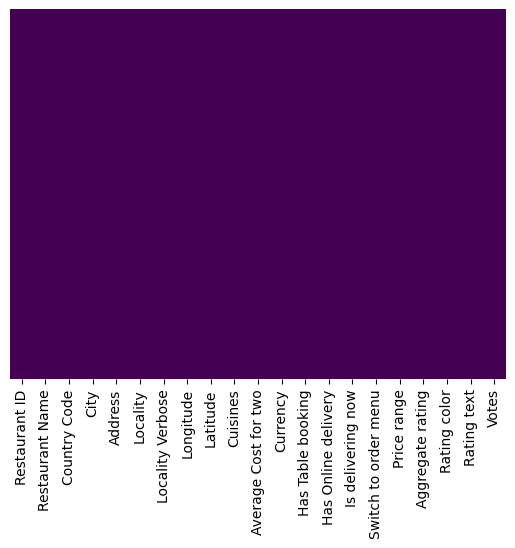

In [8]:
# representing the missing values throuh heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df_country = pd.read_excel(r"C:\Users\Master\Documents\Assingment\data science projects\EDA zomato\Zomatodataset (1)\Country-Code.xlsx")
df_country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Merging both the data 

In [10]:
# merging both the data with country code column which is common in both the dataset
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [11]:
# to check the data types
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [12]:
# finding the count of each country in the dataset
cnt_df = final_df.Country.value_counts()
cnt_df

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [13]:
# saving the country names in country_names variable
country_names=final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [14]:
# saving the count of each country in country_values variable
country_values = final_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

# Plotting the pie chart for top 3 Countries for maximum order 

([<matplotlib.patches.Wedge at 0x1a263a43150>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

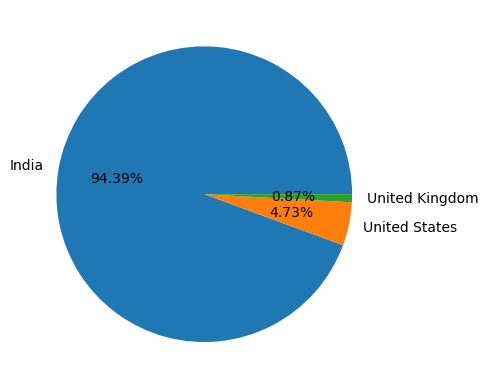

In [15]:
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%')

# Plotting the line chat for all the countries with thier count 

Text(0, 0.5, 'Count')

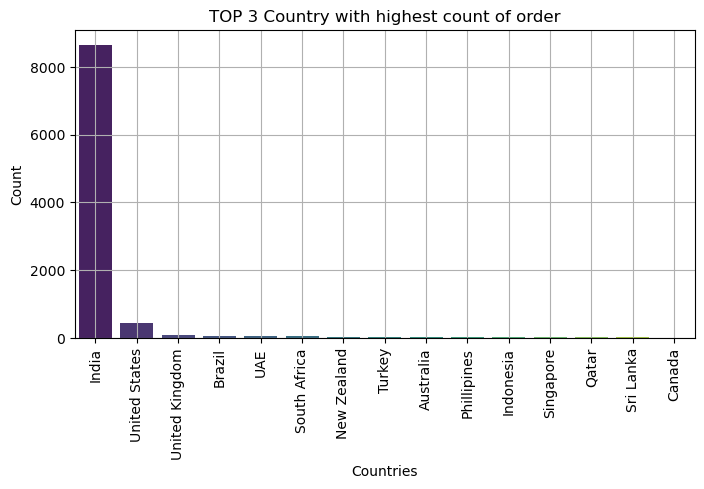

In [17]:

plt.figure(figsize=(8, 4))
sns.barplot(x=cnt_df.index, y=cnt_df.values, palette='viridis')
plt.xticks(rotation=90)
plt.grid()
plt.title('TOP 3 Country with highest count of order')
plt.xlabel('Countries')
plt.ylabel('Count')

Observation= According to the data we can see that most of the order Zomato gets is from India after that USA and after that UK

In [18]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# observation of ratings 

In [19]:
rating_df=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Ratings Count'})
rating_df

,Aggregate rating,Rating color,Rating text,Ratings Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


# Observation:
1. Rating betweeen 4.5-4.9----> Excellent
2. Rating between 4.0-4.4-----> Very Good
3. Ratind betwen 3.5-3.9-----> Good
4. Rating between 2.5-3.4----> Average
5. Rating between 1.8-2.4----> Poor
6. Ratinng 0 ----------->      Not Rated

# plotting the Ratings against thier count with respect to Ratings color 

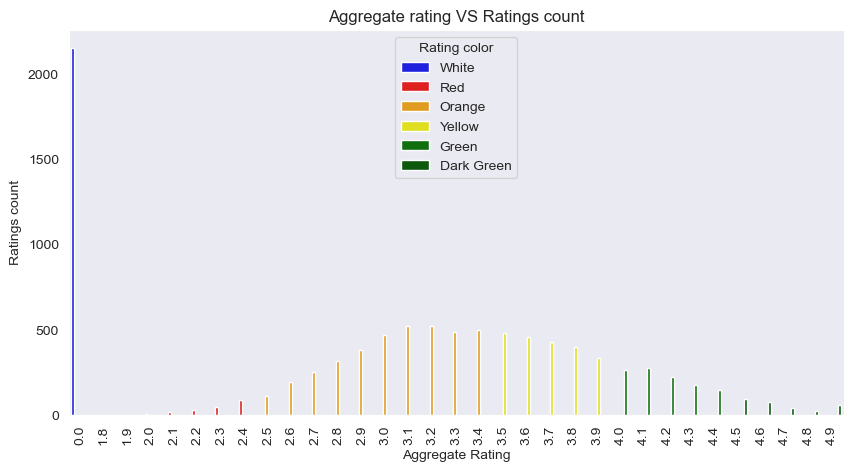

In [20]:

plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.barplot(x='Aggregate rating', y='Ratings Count', hue='Rating color', data=rating_df, 
            palette=['blue','red','orange','yellow','green','darkgreen'])
plt.xlabel('Aggregate Rating')
plt.ylabel('Ratings count')
plt.title('Aggregate rating VS Ratings count')
plt.xticks(rotation=90)
plt.show()

# Plotting the Ratings against thier NO.of.count 

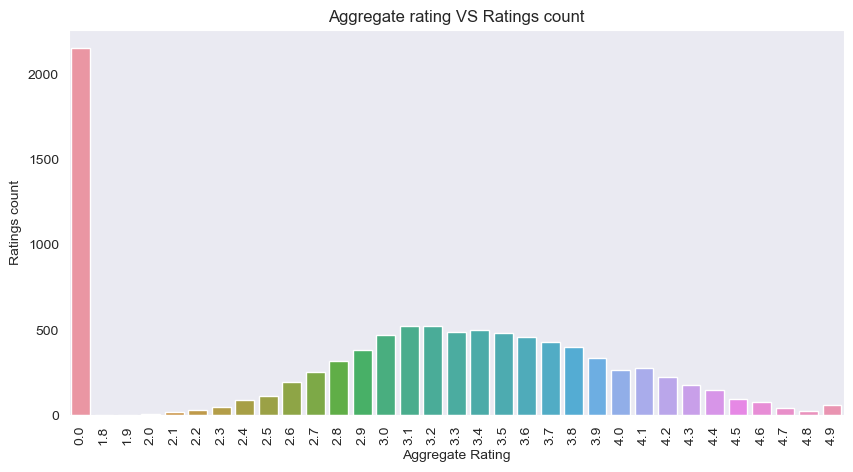

In [21]:
plt.figure(figsize=(10,5))
sns.set_style("dark")
sns.barplot(x='Aggregate rating', y='Ratings Count', data=rating_df)
plt.xlabel('Aggregate Rating')
plt.ylabel('Ratings count')
plt.title('Aggregate rating VS Ratings count')
plt.xticks(rotation=90)
plt.show()

# Observation:
After visualising the ratings data we get to know 
1.most people has not rated while most people rated it 'Average'
2.maximum ratings are between 2.5 to 3.8

# Plotting how frequently the colors are present

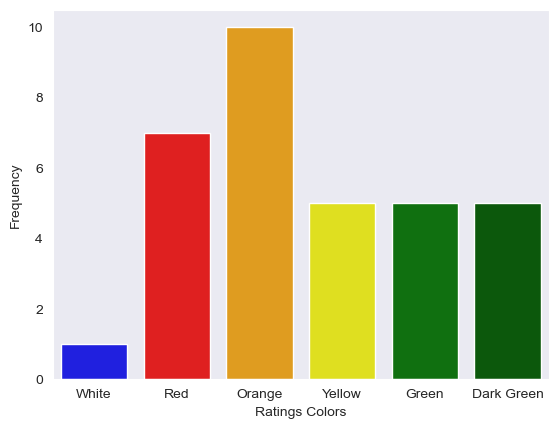

In [22]:

sns.countplot(x='Rating color', data=rating_df, palette=['blue','red','orange','yellow','green','darkgreen'])
plt.xlabel('Ratings Colors')
plt.ylabel('Frequency')
plt.show()

# country name that has given 0 Ratings 

In [23]:
# ( 2 ways )
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observation:
Maximum number of 0 ratings are from INDIAN custmers

# WHICH CURRENCY IS USED BY WHICH COUNTRY 

In [24]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [25]:
final_df.groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [26]:
final_df.groupby(['Currency','Country']).size().reset_index().drop(columns=[0])

,Currency,Country
0,Botswana Pula(P),Phillipines
1,Brazilian Real(R$),Brazil
2,Dollar($),Australia
3,Dollar($),Canada
4,Dollar($),Singapore
5,Dollar($),United States
6,Emirati Diram(AED),UAE
7,Indian Rupees(Rs.),India
8,Indonesian Rupiah(IDR),Indonesia
9,NewZealand($),New Zealand


# Which country do have online dilevery 

In [27]:
# which countries do have online dilevery 
final_df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observation:
1.online delivery are available in India and UAE

# ploting the pie chart for top 4 cities with amximum orders 

In [28]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
city_index=final_df.City.value_counts().index
city_values=final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x1a26d1fb390>,
 [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'),
  Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'),
  Text(0.8905335390443715, -0.6457166683903298, 'Noida'),
  Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')],
 [Text(-0.338590892877056, 0.4953344398088204, '69.09%'),
  Text(0.043029951178136655, -0.5984550303085497, '14.11%'),
  Text(0.4857455667514753, -0.35220909184927074, '13.63%'),
  Text(0.597030098843492, -0.05962433290972909, '3.17%')])

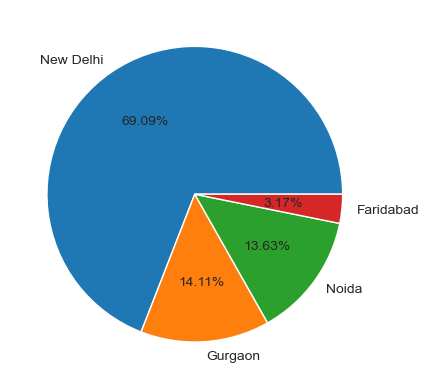

In [30]:

plt.pie(city_values[:4], labels=city_index[:4], autopct='%1.2f%%')

# Top 10 cuisines on zomato 

In [31]:
cuisine_counts = final_df.Cuisines.value_counts().head(10)

# Extract the index (cuisine names) and values (counts)
cuisine_index = cuisine_counts.index
cuisine_values = cuisine_counts.values

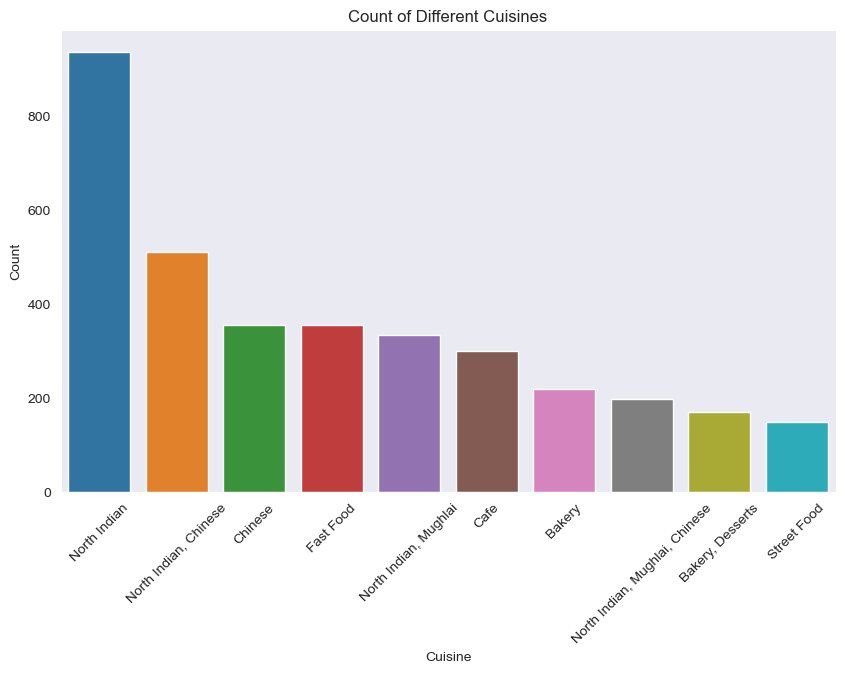

In [32]:
cuisines_df = pd.DataFrame({
    'Cuisine': cuisine_index,
    'Count': cuisine_values
})

# Plotting using sns.barplot()
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisine', y='Count', data=cuisines_df)
plt.title('Count of Different Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# ------------------------------THE END ------------------------------------